In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_csv("ola_driver.csv")

In [3]:
df.head(5)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [4]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [6]:
##Converting 'MMM-YY' feature to datetime type
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'])
##Converting 'Dateofjoining' feature to datetime type
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'])
##Converting 'LastWorkingDate' feature to datetime type
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])

In [7]:
df.head(5)

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

In [9]:
df.isnull().sum()/len(df)*100

MMM-YY                   0.000000
Driver_ID                0.000000
Age                      0.319305
Gender                   0.272194
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Dateofjoining            0.000000
LastWorkingDate         91.541039
Joining Designation      0.000000
Grade                    0.000000
Total Business Value     0.000000
Quarterly Rating         0.000000
dtype: float64

# KNN Imputation

In [10]:
data_nums=df.select_dtypes(np.number)

In [11]:
data_nums.head(4)

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,1,28.0,0.0,2,57387,1,1,2381060,2
1,1,28.0,0.0,2,57387,1,1,-665480,2
2,1,28.0,0.0,2,57387,1,1,0,2
3,2,31.0,0.0,2,67016,2,2,0,1


In [12]:
data_nums.isnull().sum()

Driver_ID                0
Age                     61
Gender                  52
Education_Level          0
Income                   0
Joining Designation      0
Grade                    0
Total Business Value     0
Quarterly Rating         0
dtype: int64

In [13]:
data_nums.drop(columns='Driver_ID',inplace=True)
columns=data_nums.columns

In [14]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean',)
imputer.fit(data_nums)
# transform the dataset
data_new = imputer.transform(data_nums)

# Data Preprocessing 

In [15]:
data_new=pd.DataFrame(data_new)

In [16]:
data_new.head(4)

,0,1,2,3,4,5,6,7
0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0
1,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0
2,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0
3,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0


In [17]:
data_new.columns=columns

In [18]:
data_new.isnull().sum()

Age                     0
Gender                  0
Education_Level         0
Income                  0
Joining Designation     0
Grade                   0
Total Business Value    0
Quarterly Rating        0
dtype: int64

In [19]:
remaining_columns=list(set(df.columns).difference(set(columns)))

In [20]:
data=pd.concat([data_new, df[remaining_columns]],axis=1)

In [21]:
data.head(5)

,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating,Dateofjoining,LastWorkingDate,City,MMM-YY,Driver_ID
0,28.0,0.0,2.0,57387.0,1.0,1.0,2381060.0,2.0,2018-12-24,NaT,C23,2019-01-01,1
1,28.0,0.0,2.0,57387.0,1.0,1.0,-665480.0,2.0,2018-12-24,NaT,C23,2019-02-01,1
2,28.0,0.0,2.0,57387.0,1.0,1.0,0.0,2.0,2018-12-24,2019-03-11,C23,2019-03-01,1
3,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020-11-06,NaT,C7,2020-11-01,2
4,31.0,0.0,2.0,67016.0,2.0,2.0,0.0,1.0,2020-11-06,NaT,C7,2020-12-01,2


# Condensing the data at the diver level, single row item.

In [22]:
function_dict = {'Age':'max', 'Gender':'first','City':'first',
'Education_Level':'last', 'Income':'last',
'Joining Designation':'last','Grade':'last',
'Dateofjoining':'last','LastWorkingDate':'last',
'Total Business Value':'sum','Quarterly Rating':'last'}
new_train=data.groupby(['Driver_ID','MMM-YY']).aggregate(function_dict)

In [23]:
new_train.head(5)

Age  Gender City  Education_Level   Income  \
Driver_ID MMM-YY                                                    
1         2019-01-01  28.0     0.0  C23              2.0  57387.0   
          2019-02-01  28.0     0.0  C23              2.0  57387.0   
          2019-03-01  28.0     0.0  C23              2.0  57387.0   
2         2020-11-01  31.0     0.0   C7              2.0  67016.0   
          2020-12-01  31.0     0.0   C7              2.0  67016.0   

                      Joining Designation  Grade Dateofjoining  \
Driver_ID MMM-YY                                                 
1         2019-01-01                  1.0    1.0    2018-12-24   
          2019-02-01                  1.0    1.0    2018-12-24   
          2019-03-01                  1.0    1.0    2018-12-24   
2         2020-11-01                  2.0    2.0    2020-11-06   
          2020-12-01                  2.0    2.0    2020-11-06   

                     LastWorkingDate  Total Business Value  Quarterly Rating  
Driver_ID MMM-YY                                                              
1         2019-01-01             NaT             2381060.0               2.0  
          2019-02-01             NaT             -665480.0               2.0  
          2019-03-01      2019-03-11                   0.0               2.0  
2         2020-11-01             NaT                   0.0               1.0  
          2020-12-01             NaT                   0.0               1.0

In [24]:
#direct sorting can work but you have to use sort_values
df=new_train.sort_index( ascending=[True,True])

In [25]:
df.head(4)

Age  Gender City  Education_Level   Income  \
Driver_ID MMM-YY                                                    
1         2019-01-01  28.0     0.0  C23              2.0  57387.0   
          2019-02-01  28.0     0.0  C23              2.0  57387.0   
          2019-03-01  28.0     0.0  C23              2.0  57387.0   
2         2020-11-01  31.0     0.0   C7              2.0  67016.0   

                      Joining Designation  Grade Dateofjoining  \
Driver_ID MMM-YY                                                 
1         2019-01-01                  1.0    1.0    2018-12-24   
          2019-02-01                  1.0    1.0    2018-12-24   
          2019-03-01                  1.0    1.0    2018-12-24   
2         2020-11-01                  2.0    2.0    2020-11-06   

                     LastWorkingDate  Total Business Value  Quarterly Rating  
Driver_ID MMM-YY                                                              
1         2019-01-01             NaT             2381060.0               2.0  
          2019-02-01             NaT             -665480.0               2.0  
          2019-03-01      2019-03-11                   0.0               2.0  
2         2020-11-01             NaT                   0.0               1.0

In [26]:
df1=pd.DataFrame()
df1['Driver_ID']=data['Driver_ID'].unique()

# Aggregation at Driver Level

In [27]:
df1['Age'] = list(df.groupby('Driver_ID',axis=0).max('MMM-YY')['Age'])
df1['Gender'] = list(df.groupby('Driver_ID').agg({'Gender':'last'})['Gender'])
df1['City'] = list(df.groupby('Driver_ID').agg({'City':'last'})['City'])
df1['Education'] = list(df.groupby('Driver_ID').agg({'Education_Level':'last'})['Education_Level'])
df1['Income'] = list(df.groupby('Driver_ID').agg({'Income':'last'})['Income'])
df1['Joining_Designation'] = list(df.groupby('Driver_ID').agg({'Joining Designation':'last'})['Joining Designation'])
df1['Grade'] = list(df.groupby('Driver_ID').agg({'Grade':'last'})['Grade'])
df1['Total_Business_Value'] = list(df.groupby('Driver_ID',axis=0).sum('Total Business Value')['Total Business Value'])
df1['Last_Quarterly_Rating'] = list(df.groupby('Driver_ID').agg({'Quarterly Rating':'last'})['Quarterly Rating'])

In [28]:
df1.head(4)

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating
0,1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0
1,2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0
2,4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0
3,5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0


In [29]:
#Quarterly rating at the beginning
qrf = df.groupby('Driver_ID').agg({'Quarterly Rating':'first'})
#Quarterly rating at the end
qrl = df.groupby('Driver_ID').agg({'Quarterly Rating':'last'})
#The dataset which has the employee ids and a bollean value which tells if the ratin
qr = (qrl['Quarterly Rating']>qrf['Quarterly Rating']).reset_index()
#the employee ids whose rating has increased
empid = qr[qr['Quarterly Rating']==True]['Driver_ID']
qri = []
for i in df1['Driver_ID']:
    if i in empid.values:
        qri.append(1)
    else:
        qri.append(0)
df1['Quarterly_Rating_Increased'] = qri

In [30]:
df1.head(4)

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased
0,1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0,0
1,2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0,0
2,4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0,0
3,5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0,0


# 1. Creating a column called target which tells if the person has left the company
# 2. Persons who have a last working date will have the value 1
# 3. The dataset which has the employee ids and specifies if last working date is null and the employee
# ids who do not have last working date are assigned 0.

In [31]:
lwr = (df.groupby('Driver_ID').agg({'LastWorkingDate':'last'})['LastWorkingDate'].isna()).reset_index()
#The employee ids who do not have last working date
empid = lwr[lwr['LastWorkingDate']==True]['Driver_ID']
target = []
for i in df1['Driver_ID']:
    if i in empid.values:
        target.append(0)
    elif i not in empid.values:
        target.append(1)
df1['Target'] = target

In [32]:
df1.head(4)

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased,Target
0,1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0,0,1
1,2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0,0,0
2,4,43.0,0.0,C13,2.0,65603.0,2.0,2.0,350000.0,1.0,0,1
3,5,29.0,0.0,C9,0.0,46368.0,1.0,1.0,120360.0,1.0,0,1


# Creating a column which tells if the monthly income has increased for that employee
# for those whose monthly income has increased we assign the value 1

In [33]:
#Quarterly rating at the beginning
sf = df.groupby('Driver_ID').agg({'Income':'first'})
#Quarterly rating at the end
sl = df.groupby('Driver_ID').agg({'Income':'last'})
#The dataset which has the employee ids and a bollean value which tells if the month
s = (sl['Income']>sf['Income']).reset_index()
#the employee ids whose monthly income has increased
empid = s[s['Income']==True]['Driver_ID']
si = []
for i in df1['Driver_ID']:
    if i in empid.values:
        si.append(1)
    else:
        si.append(0)
df1['Income_Increased'] = si

# Statistical Summary

In [34]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Driver_ID,2381.0,1.397559e+03,8.061616e+02,1.0,695.0,1400.0,2100.0,2788.0
Age,2381.0,3.377018e+01,5.933265e+00,21.0,30.0,33.0,37.0,58.0
Gender,2381.0,4.105838e-01,4.914963e-01,0.0,0.0,0.0,1.0,1.0
Education,2381.0,1.007560e+00,8.162900e-01,0.0,0.0,1.0,2.0,2.0
Income,2381.0,5.933416e+04,2.838367e+04,10747.0,39104.0,55315.0,75986.0,188418.0
Joining_Designation,2381.0,1.820244e+00,8.414334e-01,1.0,1.0,2.0,2.0,5.0
Grade,2381.0,2.096598e+00,9.415218e-01,1.0,1.0,2.0,3.0,5.0
Total_Business_Value,2381.0,4.586742e+06,9.127115e+06,-1385530.0,0.0,817680.0,4173650.0,95331060.0
Last_Quarterly_Rating,2381.0,1.427971e+00,8.098389e-01,1.0,1.0,1.0,2.0,4.0
Quarterly_Rating_Increased,2381.0,1.503570e-01,3.574961e-01,0.0,0.0,0.0,0.0,1.0


There are 2381 employees in the dataset. The minimum age of the employee in the data is 21 years and
the maximum age is 58 years. 75% of the employees have their monthly income less than or equal to
75,986 units. 50% of the mployees have acquired 8,17,680 as the their total business value.

In [35]:
df1.describe(include=['O'])

,City
count,2381
unique,29
top,C20
freq,152


Most of the drivers in the dataset were male, lived in C20 city and have completed their graduation in
education.

In [36]:
df1['Target'].value_counts()

1    1616
0     765
Name: Target, dtype: int64

Out of 2381 drivers, 1616 drivers have left the organization

In [37]:
df1['Target'].value_counts(normalize=True)*100

1    67.870643
0    32.129357
Name: Target, dtype: float64

Around 68% driver have left the organization.

<Axes: >

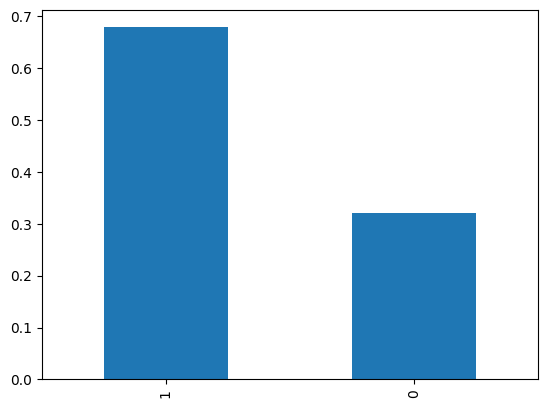

In [38]:
df1['Target'].value_counts(normalize=True).plot(kind='bar')

In [39]:
df1.head(2)

,Driver_ID,Age,Gender,City,Education,Income,Joining_Designation,Grade,Total_Business_Value,Last_Quarterly_Rating,Quarterly_Rating_Increased,Target,Income_Increased
0,1,28.0,0.0,C23,2.0,57387.0,1.0,1.0,1715580.0,2.0,0,1,0
1,2,31.0,0.0,C7,2.0,67016.0,2.0,2.0,0.0,1.0,0,0,0


In [40]:
n = ['Gender','City','Education','Joining_Designation','Grade','Last_Quarterly_Rating', 'Quarterly_Rating_Increased','Target', 'Income_Increased'] 
for i in n:
    print(df1[i].value_counts())
    print("------------------------------------------------------------")

0.0    1400
1.0     975
0.6       3
0.2       2
0.4       1
Name: Gender, dtype: int64
------------------------------------------------------------
C20    152
C15    101
C29     96
C26     93
C8      89
C27     89
C10     86
C16     84
C22     82
C3      82
C28     82
C12     81
C5      80
C1      80
C21     79
C14     79
C6      78
C4      77
C7      76
C9      75
C25     74
C23     74
C24     73
C19     72
C2      72
C17     71
C13     71
C18     69
C11     64
Name: City, dtype: int64
------------------------------------------------------------
2.0    802
1.0    795
0.0    784
Name: Education, dtype: int64
------------------------------------------------------------
1.0    1026
2.0     815
3.0     493
4.0      36
5.0      11
Name: Joining_Designation, dtype: int64
------------------------------------------------------------
2.0    855
1.0    741
3.0    623
4.0    138
5.0     24
Name: Grade, dtype: int64
------------------------------------------------------------
1.0    1744
2.0     

# Out of 2381 employees, 1404 employees are of the Male gender and 977 are females.
# Out of 2381 employees, 152 employees are from city C20 and 101 from city C15.
# Out of 2381 employees, 802 employees have their education as Graduate and 795 have completed their 12.
# Out of 2381 employees, 1026 joined with the grade as 1, 815 employees joined with the grade 2.
# Out of 2381 employees, 855 employees had their designation as 2 at the time of reporting.
# Out of 2381 employees, 1744 employees had their last quarterly rating as 1.
# Out of 2381 employees, the quarterly rating has not increased for 2076 employees.

<Axes: title={'center': 'City'}>

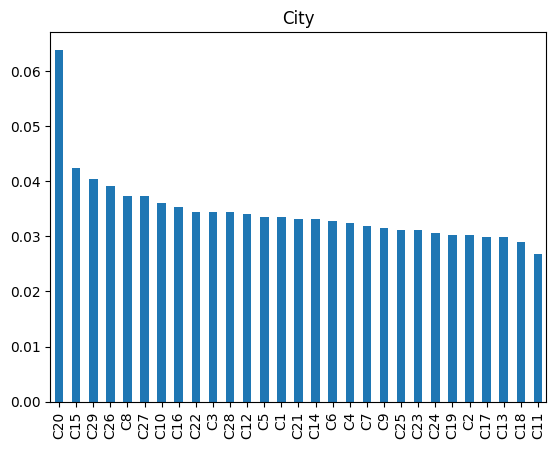

In [41]:
df1['City'].value_counts(normalize=True).plot.bar(title='City')

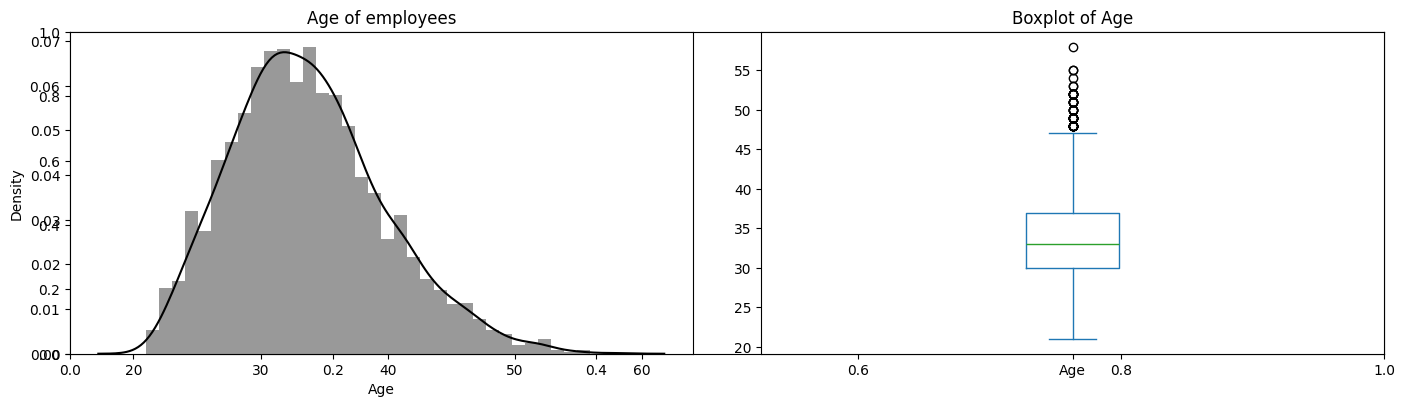

In [42]:
plt.subplots(figsize=(15,5))
plt.subplot(121)
sns.distplot(df1['Age'],color='black')
plt.title("Age of employees")
plt.subplot(122)
df1['Age'].plot.box(title='Boxplot of Age')
plt.tight_layout(pad=3)

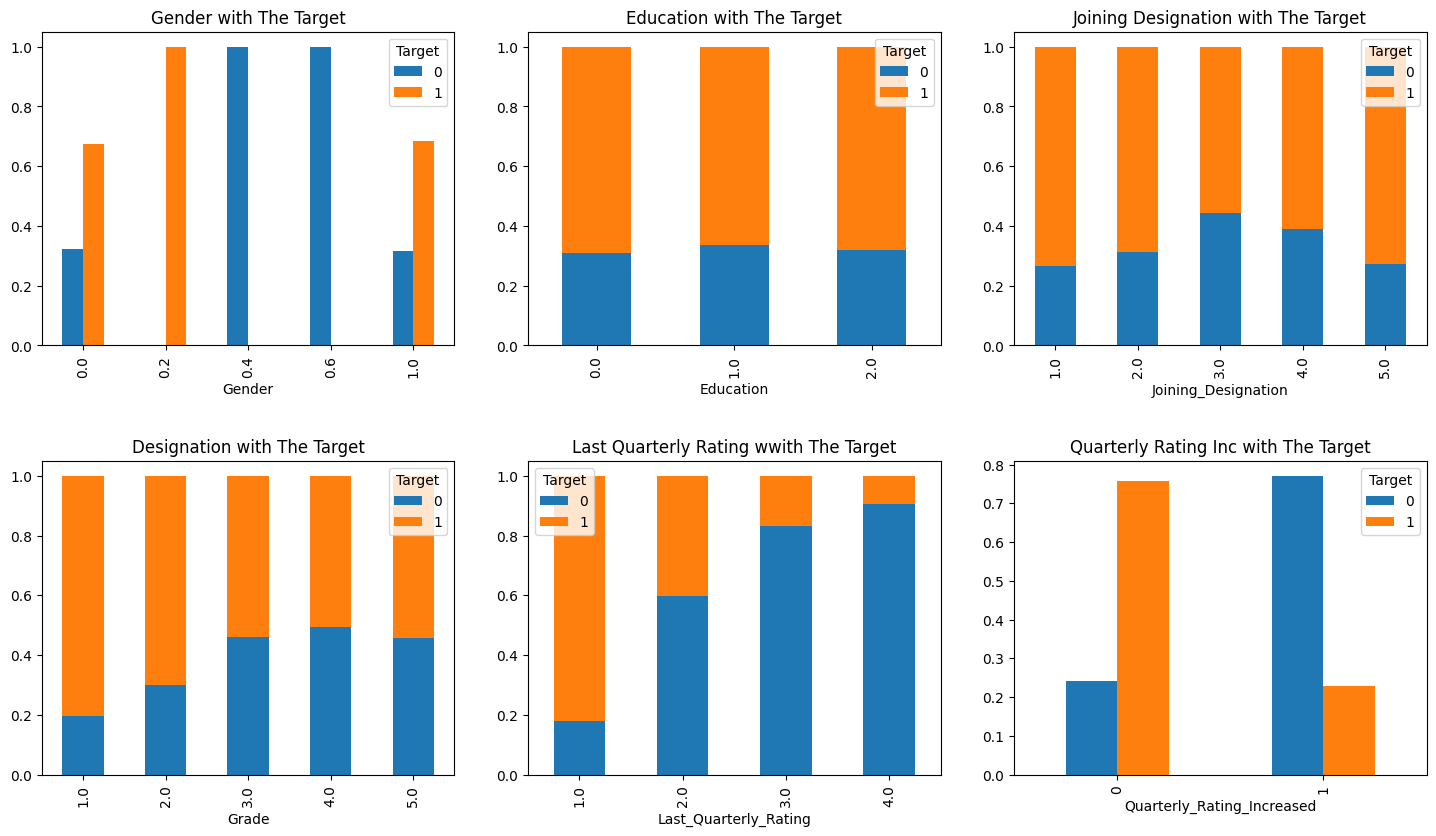

In [43]:
figure,axes=plt.subplots(2,3,figsize=(15,9))

#Gender feature with Target
gender = pd.crosstab(df1['Gender'],df1['Target'])
gender.div(gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=False,ax=axes[0,0],
title="Gender with The Target")


#Education feature with Target
education = pd.crosstab(df1['Education'],df1['Target'])
education.div(education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=axes[0,1],
title="Education with The Target")

#Joining Designation feature with Target
jde = pd.crosstab(df1['Joining_Designation'],df1['Target'])
jde.div(jde.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=axes[0,2],
title="Joining Designation with The Target")
#Designation feature with Target
desig = pd.crosstab(df1['Grade'],df1['Target'])
desig.div(desig.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=axes[1,0],
title="Designation with The Target")
#Last Quarterly Rating feature with Target
lqrate = pd.crosstab(df1['Last_Quarterly_Rating'],df1['Target'])
lqrate.div(lqrate.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,ax=axes[1,1],
title="Last Quarterly Rating wwith The Target")
#Quarterly Rating Increased feature with Target
qratei = pd.crosstab(df1['Quarterly_Rating_Increased'],df1['Target'])
qratei.div(qratei.sum(1).astype(float),axis=0).plot(kind='bar',stacked=False,ax=axes[1,2],
title="Quarterly Rating Inc with The Target")
plt.tight_layout(pad=3)

# The proportion of gender and education is more or less the same for both the employees who left
# the organization and those who did not leave.
# The employees who have their grade as 3 or 4 at the time of joining are less likely to leave the organization.
# The employees who have their grade as 3 or 4 at the time of reporting are less likely to leave the organization.
# The employees who have their last quarterly rating as 3 or 4 at the time of reporting are less likely to leave the organization.
# The employees whose quarterly rating has increased are less likely to leave the organization.

In [44]:
from sklearn.preprocessing import MinMaxScaler
#Feature Variables
X = df1.drop(['Driver_ID','Target','City'],axis=1)
X_cols=X.columns
# MinMaxScaler
scaler = MinMaxScaler()
#Mathematically learning the distribution
X=scaler.fit_transform(X)
X=pd.DataFrame(X)
X.columns=X_cols

In [45]:
#Target Variable
y = df1['Target']
# split into 80:20 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state =7)

In [46]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1904, 10), (477, 10), (1904,), (477,))

# Random Forest

In [47]:
param = {'max_depth':[2,3,4], 'n_estimators':[50,100,150,200]}
random_forest = RandomForestClassifier(class_weight ='balanced')
c = GridSearchCV(random_forest,param,cv=3,scoring='f1')
c.fit(X_train,y_train)
def display(results):
    print(f'Best parameters are : {results.best_params_}')
    print(f'The score is : {results.best_score_}')
display(c)
y_pred = c.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Best parameters are : {'max_depth': 4, 'n_estimators': 200}
The score is : 0.8612750622635889
              precision    recall  f1-score   support

           0       0.73      0.57      0.64       148
           1       0.83      0.91      0.86       329

    accuracy                           0.80       477
   macro avg       0.78      0.74      0.75       477
weighted avg       0.80      0.80      0.80       477

[[ 85  63]
 [ 31 298]]


## The Random Forest With Class Weighting method out of all predicted 0 the measure of correctly predicted is 73%, and for 1 it is 83%(Precision).
## The Random Forest With Class Weighting method out of all actual 0 the measure of correctly predicted is 57%, and for 1 it is 91%(Recall).

In [48]:
param = {'max_depth':[2,3,4], 'n_estimators':[50,100,150,200]}
random_forest = RandomForestClassifier(class_weight ='balanced_subsample')
c = GridSearchCV(random_forest,param,cv=3,scoring='f1')
c.fit(X_train,y_train)
def display(results):
    print(f'Best parameters are : {results.best_params_}')
    print(f'The score is : {results.best_score_}')
display(c)
y_pred = c.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

Best parameters are : {'max_depth': 4, 'n_estimators': 100}
The score is : 0.8624524524524523
              precision    recall  f1-score   support

           0       0.70      0.57      0.63       148
           1       0.82      0.89      0.86       329

    accuracy                           0.79       477
   macro avg       0.76      0.73      0.74       477
weighted avg       0.79      0.79      0.79       477

[[ 85  63]
 [ 36 293]]


# XGBoost

In [49]:
my_model = xgb.XGBClassifier(class_weight ='balanced')
my_model.fit(X_train, y_train)
# Predicting the Test set results
y_pred = my_model.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.63      0.54      0.58       148
           1       0.81      0.86      0.83       329

    accuracy                           0.76       477
   macro avg       0.72      0.70      0.71       477
weighted avg       0.75      0.76      0.76       477

[[ 80  68]
 [ 46 283]]


## The XGBoost method out of all predicted 0 the measure of correctly predicted is 63%, and for 1 it is 81% (Precision).
## The XGBoost method out of all actual 0 the measure of correctly predicted is 54%, and for 1 it is 86% (Recall).

# Decision Tree

In [50]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print(cm)

              precision    recall  f1-score   support

           0       0.55      0.57      0.56       148
           1       0.80      0.79      0.79       329

    accuracy                           0.72       477
   macro avg       0.67      0.68      0.68       477
weighted avg       0.72      0.72      0.72       477

[[ 84  64]
 [ 70 259]]


## The Decision Tree method out of all predicted 0 the measure of correctly predicted is 55%, and for 1 it is 80%(Precision).
## The Decision Tree method out of all actual 0 the measure of correctly predicted is 56%, and for 1 it is 79% (Recall).